## Surface Representations from VMEC file ("wout")

Necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.netcdf as netcdf
import plotly.graph_objects as go

Reads the VMEC file "wout"

In [2]:
# Load wout file
wout_file = netcdf.netcdf_file("wout_tj2curref.nc", 'r')

Read main data: 
<br>
* rmnc = Fourier coefficients for the radial values
* zmnc = Fourier coefficients for the z values
* r1 = Major radius
* r2 = Minor radius
* itor = toroidal modes
* ipol = poloidal modes
* n_surf = number of surfaces
* Nf = number of field periods for device

In [3]:
# Extract data
rmnc = wout_file.variables['rmnc'][:]
zmns = wout_file.variables['zmns'][:]
lmns = wout_file.variables['lmns'][:] #lambda
bmnc = wout_file.variables['bmnc'][:]

r1 = wout_file.variables['Rmajor_p'].getValue() 
r2 = wout_file.variables['Aminor_p'].getValue() 

itor = wout_file.variables['xn'][:]  
ipol = wout_file.variables['xm'][:]  
n_surf = wout_file.variables['ns'].getValue()  
Nf = wout_file.variables['nfp'].getValue() 
n_imode = len(itor)

Create grid of ($\varphi$,$\vartheta$) coordinates

In [4]:
# Construct flux coordinates
phi = np.linspace(0, 2*np.pi, 200)
theta = np.linspace(0, 2*np.pi, 200)
Phi, Theta = np.meshgrid(phi, theta)

Creates empty matrices for coordinates R and Z

In [5]:
#defines the matris for (r,z)
R,Z = np.empty((n_surf,len(phi),len(theta))), np.empty((n_surf,len(phi),len(theta)))
#R,Z = np.empty((len(phi),len(theta))), np.empty((len(phi),len(theta)))
#R,Z = np.empty((len(phi),len(theta),n_surf)), np.empty((len(phi),len(theta),n_surf))

Gets the magnetic surface data

#When paralelization is available.
<br>
for isurf in range(n_surf):
    for i_phi in range(len(phi)): 
        for i_theta in range(len(theta)):
            R[isurf,i_phi,i_theta] = 0
            Z[isurf,i_phi,i_theta] = 0
            for imode in range(n_imode):
                R[isurf,i_phi,i_theta] += rmnc[isurf,imode] * np.cos( (ipol[imode] * Theta[i_phi,i_theta]) - (itor[imode] * Phi[i_phi,i_theta]) )
                Z[isurf,i_phi,i_theta] += zmns[isurf,imode] * np.sin( (ipol[imode] * Theta[i_phi,i_theta]) - (itor[imode] * Phi[i_phi,i_theta]) )

# Plot Asigned Magnetic Surface

In [6]:
isurf = 100
for i_phi in range(len(phi)): 
    for i_theta in range(len(theta)):
        R[isurf,i_phi,i_theta] = 0
        Z[isurf,i_phi,i_theta] = 0
        for imode in range(n_imode):
            R[isurf,i_phi,i_theta] += rmnc[isurf,imode] * np.cos( (ipol[imode] * Theta[i_phi,i_theta]) - (itor[imode] * Phi[i_phi,i_theta]) )
            Z[isurf,i_phi,i_theta] += zmns[isurf,imode] * np.sin( (ipol[imode] * Theta[i_phi,i_theta]) - (itor[imode] * Phi[i_phi,i_theta]) )

Creates empty matrices for X and Y and transforms R and Z to cartesian

In [7]:
#X,Y = np.empty((len(phi),len(theta))), np.empty((len(phi),len(theta)))
X,Y = np.empty((n_surf,len(phi),len(theta))), np.empty((n_surf,len(phi),len(theta)))
X = R * np.cos(Phi)
Y = R * np.sin(Phi)

### Magnetic Surface Plot

<IPython.core.display.Javascript object>


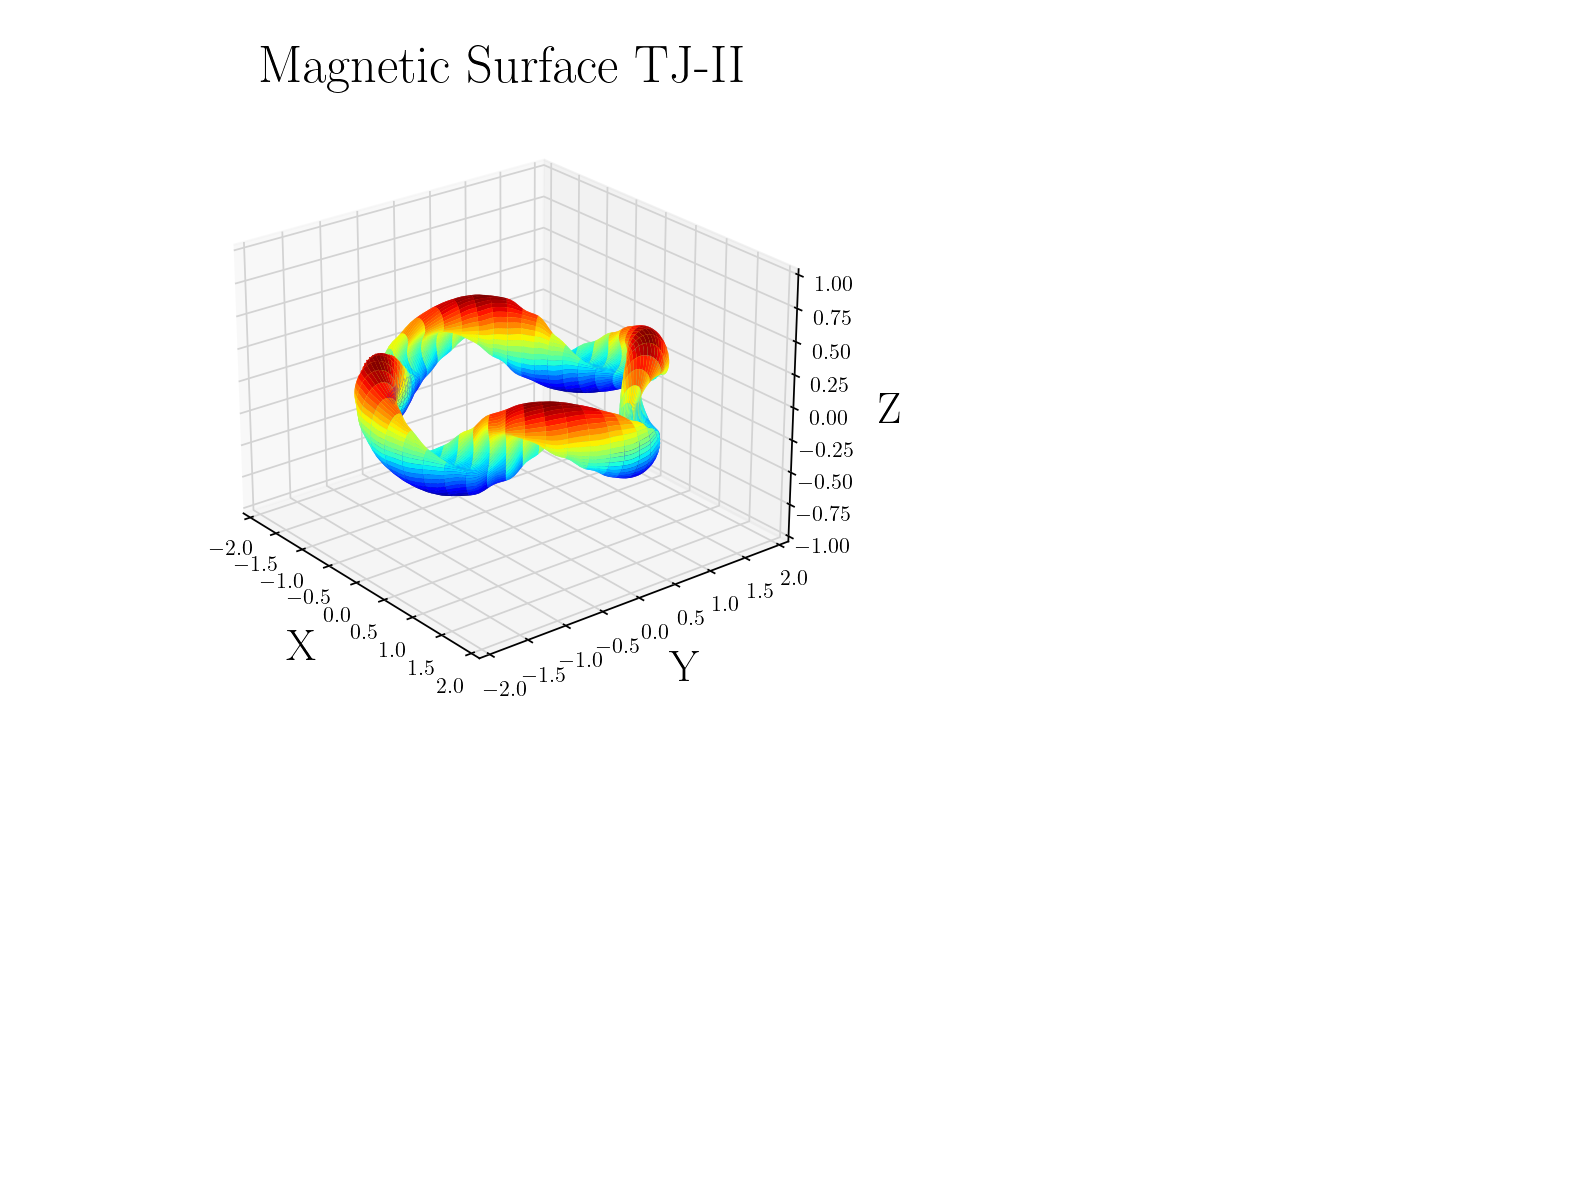

In [8]:
surf_plot = 100

# Plot the 3D plasma flux
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X[isurf,:,:],Y[isurf,:,:],Z[isurf,:,:],cmap="jet")

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title("Magnetic Surface TJ-II")

ax.xaxis.set_tick_params(labelsize=10,pad=1)
ax.yaxis.set_tick_params(labelsize=10,pad=1)
ax.zaxis.set_tick_params(labelsize=10,pad=1)
ax.set_zlim(-1,1)
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

In [9]:
plt.savefig("3D_TJ-II.png",dpi=800)

# Plots the poloidal proyection in the given toroidal angle

In [5]:
#defines the matris for (r,z)
R,Z = np.empty((n_surf,len(phi),len(theta))), np.empty((n_surf,len(phi),len(theta)))

In [6]:
i_phi = 0
for isurf in range(n_surf): 
    for i_theta in range(len(theta)):
        R[isurf,i_phi,i_theta] = 0
        Z[isurf,i_phi,i_theta] = 0
        for imode in range(n_imode):
            R[isurf,i_phi,i_theta] += rmnc[isurf,imode] * np.cos( (ipol[imode] * Theta[i_phi,i_theta]) - (itor[imode] * Phi[i_phi,i_theta]) )
            Z[isurf,i_phi,i_theta] += zmns[isurf,imode] * np.sin( (ipol[imode] * Theta[i_phi,i_theta]) - (itor[imode] * Phi[i_phi,i_theta]) )

In [7]:
#X,Y = np.empty((len(phi),len(theta))), np.empty((len(phi),len(theta)))
X,Y = np.empty((n_surf,len(phi),len(theta))), np.empty((n_surf,len(phi),len(theta)))
X = R * np.cos(Phi)
Y = R * np.sin(Phi)

<IPython.core.display.Javascript object>


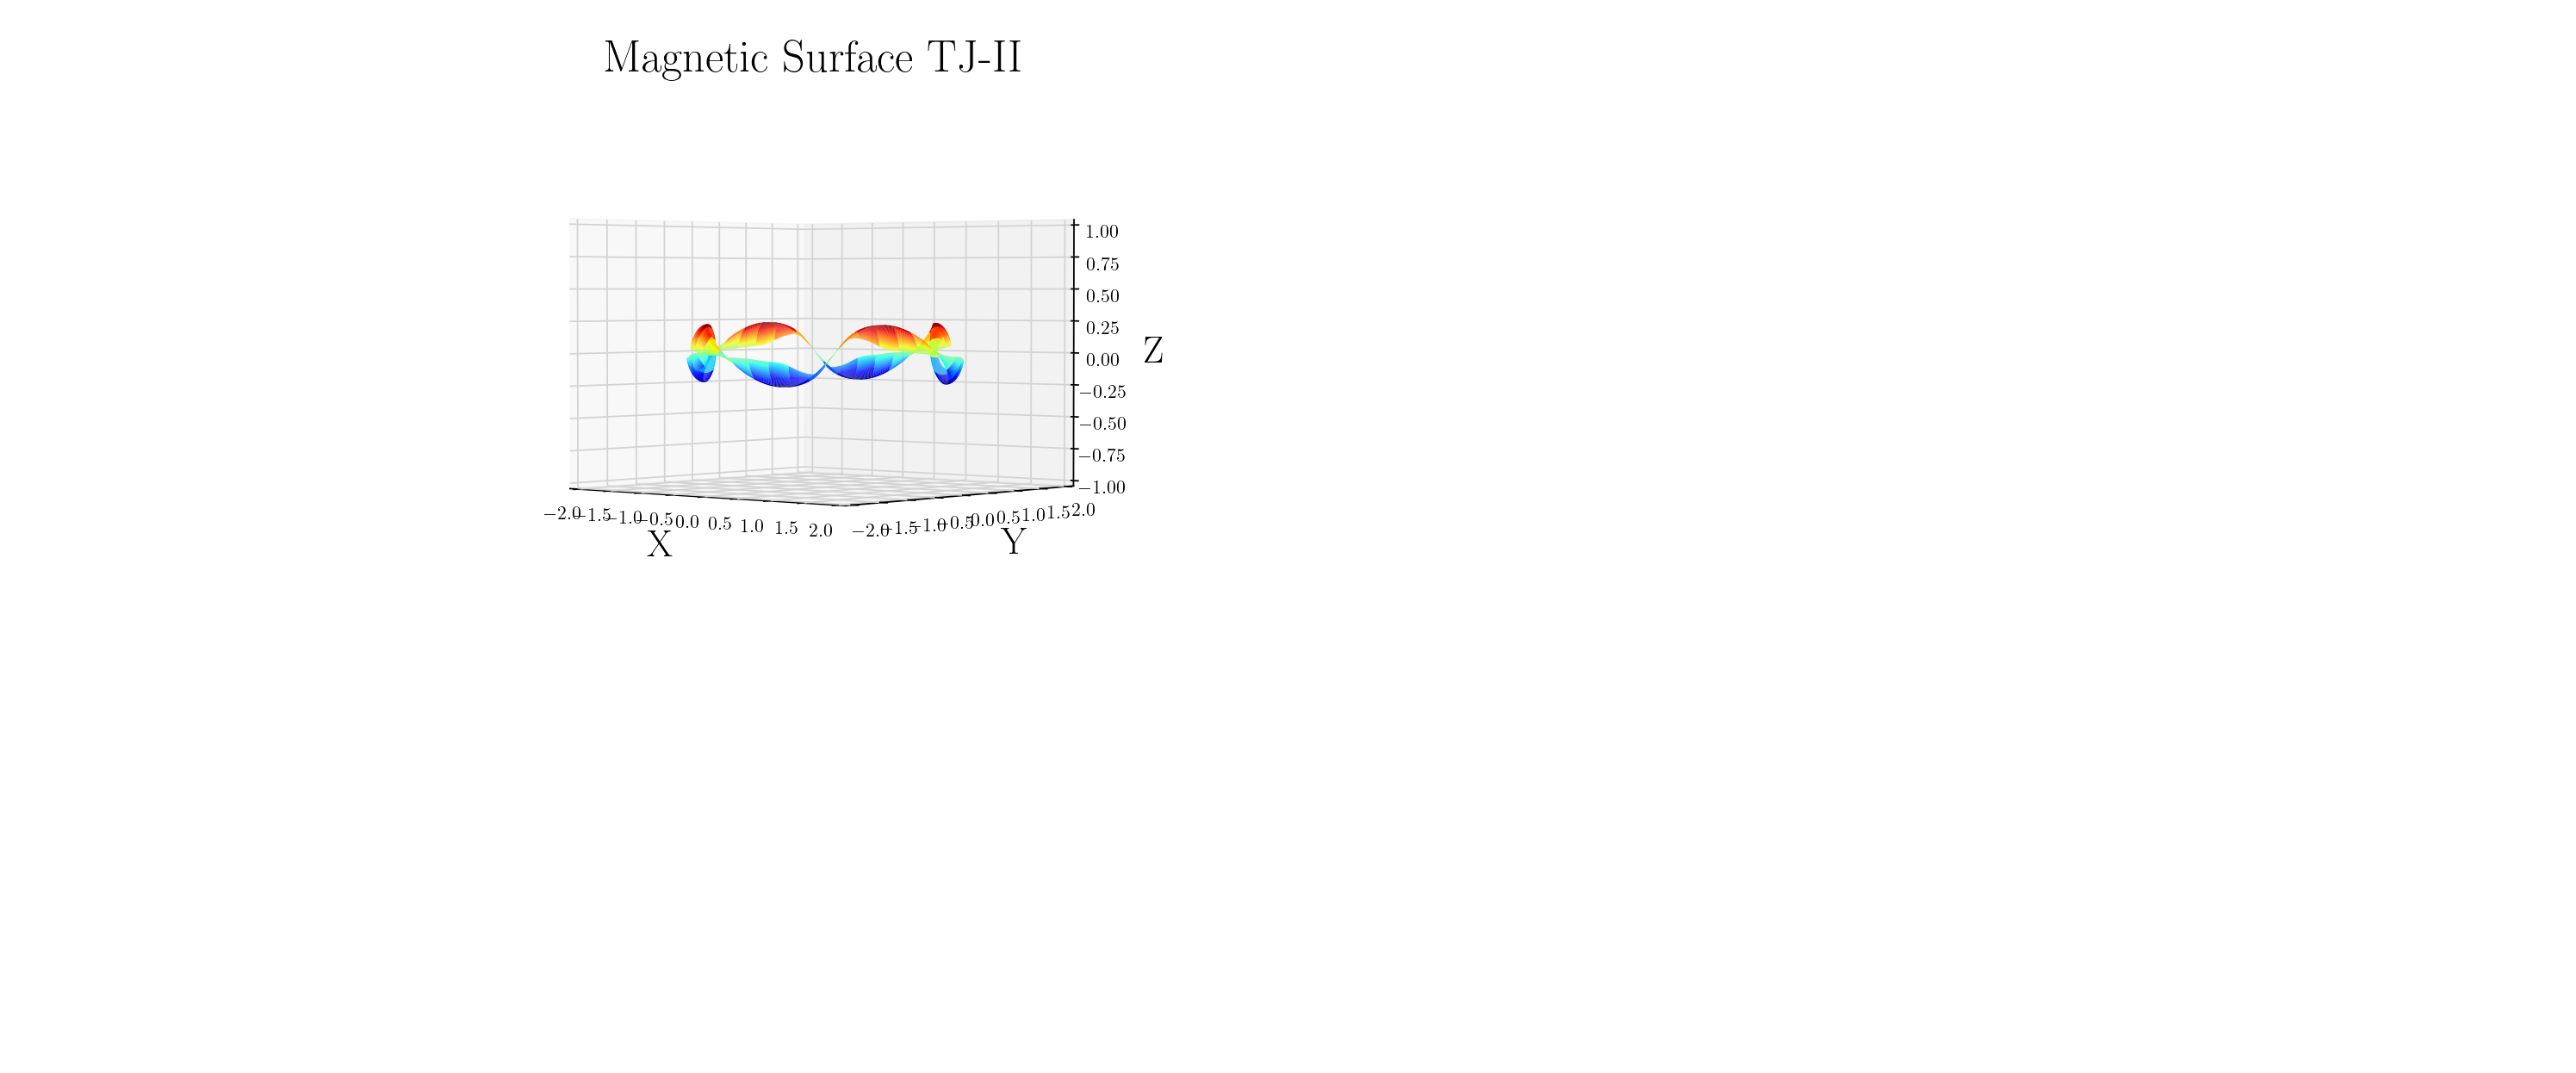

In [9]:
#i_theta = 0
# Plot the 3D plasma flux
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X[:,i_phi,:],Y[:,i_phi,:],Z[:,i_phi,:],cmap="jet")

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title("Magnetic Surface TJ-II")

ax.xaxis.set_tick_params(labelsize=10,pad=1)
ax.yaxis.set_tick_params(labelsize=10,pad=1)
ax.zaxis.set_tick_params(labelsize=10,pad=1)
ax.set_zlim(-1,1)
plt.rcParams['figure.figsize'] = [12, 5]
plt.show()